#**Analisis EDA**

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import pyplot as plt
from wordcloud import WordCloud

%matplotlib inline

## Recopilacion y carga de datos

In [2]:
#Cursos Udemy
df3=pd.read_csv('https://raw.githubusercontent.com/Fe23arg/Pi1_12_DEV/main/raw/final_Api_12.csv')
df3.head(4)

,id,directores,budget,original_language,release_date,revenue,runtime,title,vote_average,vote_count,release_year,Franquicia_P,paises,productoras
0,862,['John Lasseter'],30000000.0,en,1995-10-30,373554033.0,81.0,Toy Story,7.7,5415.0,1995,Toy Story Collection,United States of America,Pixar Animation Studios
1,8844,['Joe Johnston'],65000000.0,en,1995-12-15,262797249.0,104.0,Jumanji,6.9,2413.0,1995,sin_franquicia,United States of America,"['TriStar Pictures', 'Teitler Film', 'Intersco..."
2,15602,['Howard Deutch'],0.0,en,1995-12-22,0.0,101.0,Grumpier Old Men,6.5,92.0,1995,Grumpy Old Men Collection,United States of America,"['Warner Bros.', 'Lancaster Gate']"
3,31357,['Forest Whitaker'],16000000.0,en,1995-12-22,81452156.0,127.0,Waiting to Exhale,6.1,34.0,1995,sin_franquicia,United States of America,Twentieth Century Fox Film Corporation


In [3]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45448 entries, 0 to 45447
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 45448 non-null  int64  
 1   directores         45448 non-null  object 
 2   budget             45448 non-null  float64
 3   original_language  45437 non-null  object 
 4   release_date       45448 non-null  object 
 5   revenue            45448 non-null  float64
 6   runtime            45202 non-null  float64
 7   title              45448 non-null  object 
 8   vote_average       45448 non-null  float64
 9   vote_count         45448 non-null  float64
 10  release_year       45448 non-null  int64  
 11  Franquicia_P       45448 non-null  object 
 12  paises             45448 non-null  object 
 13  productoras        45448 non-null  object 
dtypes: float64(5), int64(2), object(7)
memory usage: 4.9+ MB


In [4]:
df3.dtypes

id                     int64
directores            object
budget               float64
original_language     object
release_date          object
revenue              float64
runtime              float64
title                 object
vote_average         float64
vote_count           float64
release_year           int64
Franquicia_P          object
paises                object
productoras           object
dtype: object

In [7]:
# Cantidad de filas y columnas de cada dataframe(csv) provisto:
print('                   Filas , Columnas ')
print("Cantidad:         "+str(df3.shape))

                   Filas , Columnas 
Cantidad:         (45448, 14)


## Busqueda de valores nulos

In [8]:

df3.isnull().sum()

id                     0
directores             0
budget                 0
original_language     11
release_date           0
revenue                0
runtime              246
title                  0
vote_average           0
vote_count             0
release_year           0
Franquicia_P           0
paises                 0
productoras            0
dtype: int64

In [9]:
df3.columns

Index(['id', 'directores', 'budget', 'original_language', 'release_date',
       'revenue', 'runtime', 'title', 'vote_average', 'vote_count',
       'release_year', 'Franquicia_P', 'paises', 'productoras'],
      dtype='object')

In [10]:
df3c=df3.copy()

In [11]:
df3c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45448 entries, 0 to 45447
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 45448 non-null  int64  
 1   directores         45448 non-null  object 
 2   budget             45448 non-null  float64
 3   original_language  45437 non-null  object 
 4   release_date       45448 non-null  object 
 5   revenue            45448 non-null  float64
 6   runtime            45202 non-null  float64
 7   title              45448 non-null  object 
 8   vote_average       45448 non-null  float64
 9   vote_count         45448 non-null  float64
 10  release_year       45448 non-null  int64  
 11  Franquicia_P       45448 non-null  object 
 12  paises             45448 non-null  object 
 13  productoras        45448 non-null  object 
dtypes: float64(5), int64(2), object(7)
memory usage: 4.9+ MB


##2. Limpieza datos
>Eliminar,Unir,Dividir columnas para entender mejor los datos.Revisar q tengan nombre y sobre todo el indice

In [12]:
#Se muestran los elementos en el dataframe duplicados  estos elementos estan repetidos:
df3c[df3c.duplicated()]

,id,directores,budget,original_language,release_date,revenue,runtime,title,vote_average,vote_count,release_year,Franquicia_P,paises,productoras
677,105045,['Margarethe von Trotta'],0.0,de,1995-02-16,0.0,115.0,The Promise,5.0,1.0,1995,sin_franquicia,Germany,"['Studio Babelsberg', 'Centre National de la C..."
678,105045,['Margarethe von Trotta'],0.0,de,1995-02-16,0.0,115.0,The Promise,5.0,1.0,1995,sin_franquicia,Germany,"['Studio Babelsberg', 'Centre National de la C..."
679,105045,['Margarethe von Trotta'],0.0,de,1995-02-16,0.0,115.0,The Promise,5.0,1.0,1995,sin_franquicia,Germany,"['Studio Babelsberg', 'Centre National de la C..."
840,132641,['Mikio Naruse'],0.0,ja,1953-04-29,0.0,89.0,Wife,0.0,0.0,1953,sin_franquicia,Japan,Toho Company
841,132641,['Mikio Naruse'],0.0,ja,1953-04-29,0.0,89.0,Wife,0.0,0.0,1953,sin_franquicia,Japan,Toho Company
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25951,43629,['Christopher Nolan'],0.0,xx,1997-01-01,0.0,3.0,Doodlebug,6.6,105.0,1997,sin_franquicia,United Kingdom,sin_informacion
25953,187156,"[""Shane O'Sullivan""]",0.0,en,2009-09-30,0.0,24.0,Jean-Luc Cinema Godard,0.0,0.0,2009,sin_franquicia,United Kingdom,sin_informacion
33225,298721,['Apichatpong Weerasethakul'],980000.0,th,2015-09-02,0.0,122.0,Cemetery of Splendour,4.4,50.0,2015,sin_franquicia,"['United Kingdom', 'United States of America',...","['Match Factory, The', 'Louverture Films', 'To..."
33226,298721,['Apichatpong Weerasethakul'],980000.0,th,2015-09-02,0.0,122.0,Cemetery of Splendour,4.4,50.0,2015,sin_franquicia,"['United Kingdom', 'United States of America',...","['Match Factory, The', 'Louverture Films', 'To..."


In [13]:
df3c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45448 entries, 0 to 45447
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 45448 non-null  int64  
 1   directores         45448 non-null  object 
 2   budget             45448 non-null  float64
 3   original_language  45437 non-null  object 
 4   release_date       45448 non-null  object 
 5   revenue            45448 non-null  float64
 6   runtime            45202 non-null  float64
 7   title              45448 non-null  object 
 8   vote_average       45448 non-null  float64
 9   vote_count         45448 non-null  float64
 10  release_year       45448 non-null  int64  
 11  Franquicia_P       45448 non-null  object 
 12  paises             45448 non-null  object 
 13  productoras        45448 non-null  object 
dtypes: float64(5), int64(2), object(7)
memory usage: 4.9+ MB


In [14]:
df3c.drop_duplicates(inplace=True)

In [15]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45448 entries, 0 to 45447
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 45448 non-null  int64  
 1   directores         45448 non-null  object 
 2   budget             45448 non-null  float64
 3   original_language  45437 non-null  object 
 4   release_date       45448 non-null  object 
 5   revenue            45448 non-null  float64
 6   runtime            45202 non-null  float64
 7   title              45448 non-null  object 
 8   vote_average       45448 non-null  float64
 9   vote_count         45448 non-null  float64
 10  release_year       45448 non-null  int64  
 11  Franquicia_P       45448 non-null  object 
 12  paises             45448 non-null  object 
 13  productoras        45448 non-null  object 
dtypes: float64(5), int64(2), object(7)
memory usage: 4.9+ MB


In [16]:
df3c.reset_index(inplace=True, drop=True)

In [17]:
df3c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45349 entries, 0 to 45348
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 45349 non-null  int64  
 1   directores         45349 non-null  object 
 2   budget             45349 non-null  float64
 3   original_language  45338 non-null  object 
 4   release_date       45349 non-null  object 
 5   revenue            45349 non-null  float64
 6   runtime            45103 non-null  float64
 7   title              45349 non-null  object 
 8   vote_average       45349 non-null  float64
 9   vote_count         45349 non-null  float64
 10  release_year       45349 non-null  int64  
 11  Franquicia_P       45349 non-null  object 
 12  paises             45349 non-null  object 
 13  productoras        45349 non-null  object 
dtypes: float64(5), int64(2), object(7)
memory usage: 4.8+ MB


Variable con valores numericos

In [18]:
df3c.describe()

,id,budget,revenue,runtime,vote_average,vote_count,release_year
count,45349.000000,4.534900e+04,4.534900e+04,45103.000000,45349.000000,45349.000000,45349.000000
mean,108025.601138,4.233226e+06,1.123589e+07,94.178702,5.624292,110.134204,1991.878233
std,112174.674855,1.744355e+07,6.440850e+07,38.343274,1.915093,491.883190,24.056950
min,2.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1874.000000
25%,26388.000000,0.000000e+00,0.000000e+00,85.000000,5.000000,3.000000,1978.000000
50%,59847.000000,0.000000e+00,0.000000e+00,95.000000,6.000000,10.000000,2001.000000
75%,156566.000000,0.000000e+00,0.000000e+00,107.000000,6.800000,34.000000,2010.000000
max,469172.000000,3.800000e+08,2.787965e+09,1256.000000,10.000000,14075.000000,2020.000000


## Outliers
>Son unos datos que se alejan del siguiente punto más cercano.
1.   >Outlier univariado
2.   >Outlier multivariado/bivariado:
  cuando ploteamos una variable con otra el valor se disgrega del valor esperado de manera anormal
  Antes de proceder a eso tenemos que estandardizar los valores para que escalas diferentes no nos lleven a conclusiones equivocadas.


In [19]:
df3c.vote_average.value_counts()

0.0    2943
6.0    2462
5.0    1995
7.0    1882
6.5    1722
       ... 
9.1       2
9.6       1
9.8       1
0.7       1
1.1       1
Name: vote_average, Length: 92, dtype: int64

In [20]:
df3c.original_language.value_counts(normalize=True)

en    0.709934
fr    0.053708
it    0.033702
ja    0.029732
de    0.023755
        ...   
jv    0.000022
qu    0.000022
la    0.000022
fy    0.000022
si    0.000022
Name: original_language, Length: 89, dtype: float64

In [21]:
df3c.sort_values('id', inplace=True)
df3c.head()

,id,directores,budget,original_language,release_date,revenue,runtime,title,vote_average,vote_count,release_year,Franquicia_P,paises,productoras
4339,2,['Aki Kaurismäki'],0.0,fi,1988-10-21,0.0,69.0,Ariel,7.1,44.0,1988,sin_franquicia,Finland,"['Villealfa Filmproduction Oy', 'Finnish Film ..."
12942,3,['Aki Kaurismäki'],0.0,fi,1986-10-16,0.0,76.0,Shadows in Paradise,7.1,35.0,1986,sin_franquicia,Finland,Villealfa Filmproduction Oy
17,5,"['Allison Anders', 'Alexandre Rockwell', 'Robe...",4000000.0,en,1995-12-09,4300000.0,98.0,Four Rooms,6.5,539.0,1995,sin_franquicia,United States of America,"['Miramax Films', 'A Band Apart']"
474,6,['Stephen Hopkins'],0.0,en,1993-10-15,12136938.0,110.0,Judgment Night,6.4,79.0,1993,sin_franquicia,"['Japan', 'United States of America']","['Universal Pictures', 'Largo Entertainment', ..."
256,11,['George Lucas'],11000000.0,en,1977-05-25,775398007.0,121.0,Star Wars,8.1,6778.0,1977,Star Wars Collection,United States of America,"['Lucasfilm', 'Twentieth Century Fox Film Corp..."


In [81]:
#urdeni el dataset por ganancia
df3o= df3c.sort_values('revenue',ascending=False)
df3o.head()


,id,directores,budget,original_language,release_date,revenue,runtime,title,vote_average,vote_count,release_year,Franquicia_P,paises,productoras
14546,19995,['James Cameron'],237000000.0,en,2009-12-10,2.787965e+09,162.0,Avatar,7.2,12114.0,2009,Avatar Collection,"['United States of America', 'United Kingdom']","['Ingenious Film Partners', 'Twentieth Century..."
26514,140607,['J.J. Abrams'],245000000.0,en,2015-12-15,2.068224e+09,136.0,Star Wars: The Force Awakens,7.5,7993.0,2015,sin_franquicia,United States of America,"['Lucasfilm', 'Truenorth Productions', 'Bad Ro..."
1636,597,['James Cameron'],200000000.0,en,1997-11-18,1.845034e+09,194.0,Titanic,7.5,7770.0,1997,sin_franquicia,United States of America,"['Paramount Pictures', 'Twentieth Century Fox ..."
17806,24428,['Joss Whedon'],220000000.0,en,2012-04-25,1.519558e+09,143.0,The Avengers,7.4,12000.0,2012,The Avengers Collection,United States of America,"['Paramount Pictures', 'Marvel Studios']"
25043,135397,['Colin Trevorrow'],150000000.0,en,2015-06-09,1.513529e+09,124.0,Jurassic World,6.5,8842.0,2015,sin_franquicia,United States of America,"['Universal Studios', 'Amblin Entertainment', ..."


*Selecciono las peliculas de los ultimos dies años con la mayor ganancia*

In [82]:
df3o1=df3o.loc[df3['release_year'] >= 2013, ['title', 'revenue','original_language','budget','id','Franquicia_P','paises','vote_average','release_year','runtime']].sort_values('revenue',ascending=False)
df3o1.head(10)

,title,revenue,original_language,budget,id,Franquicia_P,paises,vote_average,release_year,runtime
28787,Furious 7,1.506249e+09,en,190000000.0,168259,sin_franquicia,"['Japan', 'United States of America']",7.3,2015,137.0
43156,The Fate of the Furious,1.238765e+09,en,250000000.0,337339,sin_franquicia,United States of America,6.8,2017,136.0
36186,Zootopia,1.023784e+09,en,150000000.0,269149,sin_franquicia,United States of America,7.7,2016,108.0
30449,The Secret Life of Pets,8.754579e+08,en,75000000.0,328111,sin_franquicia,United States of America,5.9,2016,87.0
31021,Batman v Superman: Dawn of Justice,8.732602e+08,en,250000000.0,209112,sin_franquicia,United States of America,5.7,2016,151.0
30351,Fantastic Beasts and Where to Find Them,8.093423e+08,en,180000000.0,259316,sin_franquicia,"['United Kingdom', 'United States of America']",7.2,2016,133.0
23401,Maleficent,7.585398e+08,en,180000000.0,102651,sin_franquicia,United States of America,7.0,2014,97.0
30493,Suicide Squad,7.456001e+08,en,175000000.0,297761,sin_franquicia,United States of America,5.9,2016,123.0
23151,The Amazing Spider-Man 2,7.057174e+08,en,200000000.0,102382,sin_franquicia,United States of America,6.5,2014,142.0
21910,Thor: The Dark World,6.445714e+08,en,170000000.0,76338,sin_franquicia,United States of America,6.8,2013,112.0


In [83]:
df3o1['Franquicia_P'].value_counts()

sin_franquicia                             7273
The Bowery Boys                              12
Totò Collection                               8
Zatôichi: The Blind Swordsman                 8
Fantozzi Collection                           8
                                           ... 
The Hunger Games Collection                   1
Get Smart Collection                          1
Lone Wolf film series                         1
The Dead Collection                           1
The Sally Lochhart Mysteries Collection       1
Name: Franquicia_P, Length: 439, dtype: int64

In [84]:
df3o1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7896 entries, 28787 to 27769
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              7896 non-null   object 
 1   revenue            7896 non-null   float64
 2   original_language  7893 non-null   object 
 3   budget             7896 non-null   float64
 4   id                 7896 non-null   int64  
 5   Franquicia_P       7896 non-null   object 
 6   paises             7896 non-null   object 
 7   vote_average       7896 non-null   float64
 8   release_year       7896 non-null   int64  
 9   runtime            7828 non-null   float64
dtypes: float64(4), int64(2), object(4)
memory usage: 678.6+ KB


In [85]:
df5=df3o1.groupby(['Franquicia_P','title'])['budget'].mean()
df5

Franquicia_P                          title                               
... Has Fallen Collection             Providence                                     0.0
                                      The Call                                13000000.0
00 Schneider Filmreihe                Sven's Secret                                  0.0
08/15 Collection                      Il castello                                    0.0
101 Dalmatians (Animated) Collection  To Grandmother's House We Go                   0.0
                                                                                 ...    
Облако-рай (Коллекция)                A Long and Happy Life                          0.0
                                      Mister Designer                                0.0
Параграф 78 - Дилогия                 Bella Mafia                                    0.0
Самый лучший фильм - Коллекция        David Lean and His Dedicated Maniacs           0.0
Сказки Чуковского                  

*Visualizo presupuesto medio de las cien peliculas con mayor presupuesto o costo medio invertido en sus peliculas ,agrupadas por franquicias, en los ultimos 10 años  *



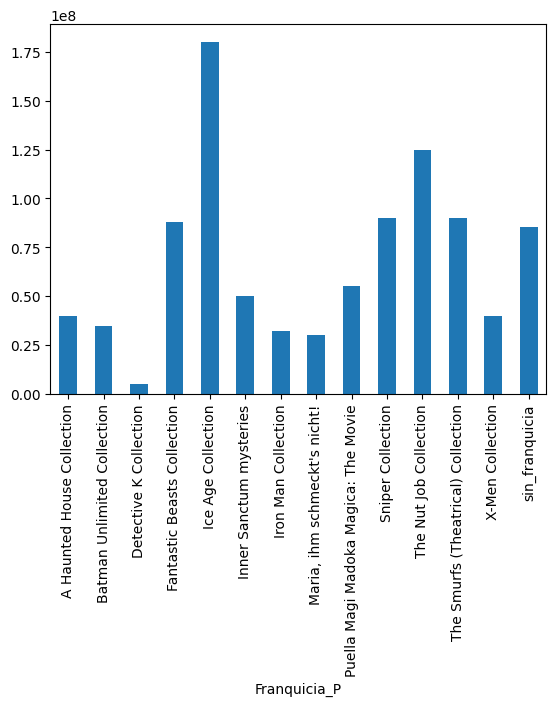

In [86]:
 # Visualizo presupuesto medio de las cien peliculas con mayor presupuesto o costo
 # medio invertido en sus peliculas ,agrupadas por franquicias, en los ultimos 10 años


df3o1[0:100].groupby('Franquicia_P')['budget'].mean().plot.bar()
plt.show()

*Visualizo ganancia media de las cien peliculas con mayor presupuesto o costo medio invertido en sus peliculas agrupadas por franquicias, en los ultimos 10 años  *


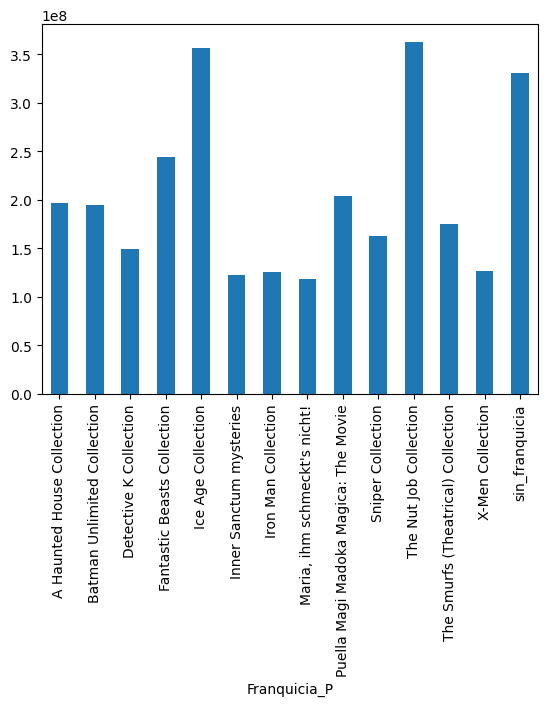

In [ ]:
# Visualizo ganancia media de las cien peliculas con mayor presupuesto o costo medio
# invertido en sus peliculas ,agrupadas por franquicias, en los ultimos 10 años  *

df3o1[0:100].groupby('Franquicia_P')['revenue'].mean().plot.bar()
plt.show()

*Visualizo ganancia media de las cien peliculas con mayor presupuesto o costo medio invertido en sus peliculas ,agrupadas por paises, en los ultimos 10 años ,el mercado japones y americano en proporcion como paises produtores de pelicula son  los que han recaudado mas*

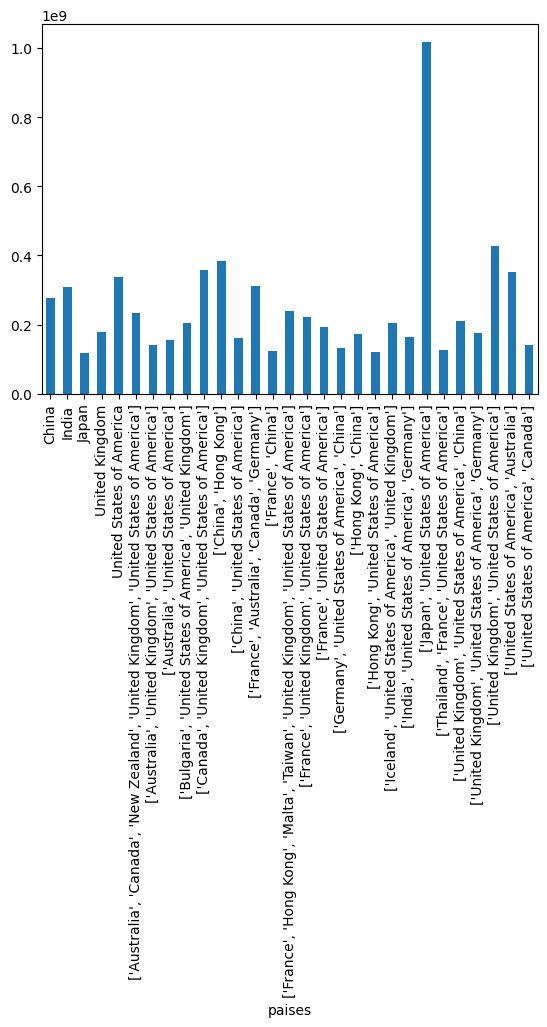

In [87]:
# Visualizo ganacia media de las cien peliculas con mayor presupuesto o costo medio
# invertido en sus peliculas ,agrupadas por paises, en los ultimos 10 años  *

df3o1[0:100].groupby('paises')['revenue'].mean().plot.bar()
plt.show()

### Analisis univariada Variable categorica ordenada

>Estas variables tienen un orden natural


In [65]:
dfff=df3o1[df3o1['Franquicia_P']!='sin_franquicia'].copy()
dfff.head(10)

,title,revenue,original_language,budget,id,Franquicia_P,paises,vote_average,release_year,runtime
23026,Noah,362637473.0,en,125000000.0,86834,The Nut Job Collection,United States of America,5.5,2014,139.0
39252,The Legend of Tarzan,356743061.0,en,180000000.0,258489,Ice Age Collection,"['Canada', 'United Kingdom', 'United States of...",5.5,2016,109.0
30349,Pixels,243637091.0,en,88000000.0,257344,Fantastic Beasts Collection,United States of America,5.6,2015,105.0
32966,Everest,203427584.0,en,55000000.0,253412,Puella Magi Madoka Magica: The Movie,"['Iceland', 'United States of America', 'Unite...",6.7,2015,121.0
23209,The Other Woman,196781193.0,en,40000000.0,193610,A Haunted House Collection,United States of America,6.2,2014,109.0
32063,The Intern,194564672.0,en,35000000.0,257211,Batman Unlimited Collection,United States of America,7.1,2015,121.0
21351,Percy Jackson: Sea of Monsters,174578751.0,en,90000000.0,76285,The Smurfs (Theatrical) Collection,United States of America,5.9,2013,106.0
39851,The Magnificent Seven,162360636.0,en,90000000.0,333484,Sniper Collection,United States of America,5.9,2016,132.0
39256,Lights Out,148868835.0,en,4900000.0,345911,Detective K Collection,United States of America,6.3,2016,81.0
23322,Lucy,126546825.0,en,40000000.0,240832,X-Men Collection,"['France', 'United States of America']",6.3,2014,89.0


(0.0, 400.0)

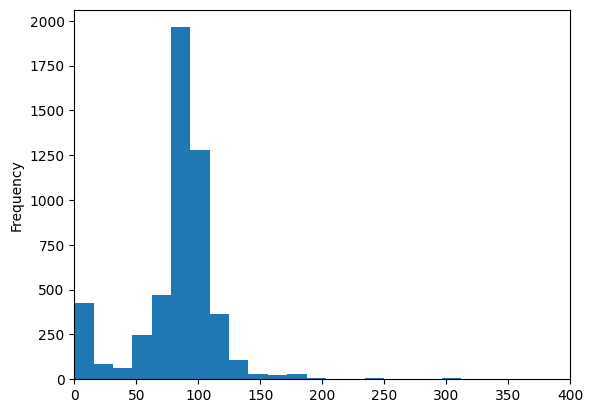

In [80]:

df3o1[df3o1['original_language']=='en'].runtime.plot.hist(bins = 50)
plt.xlim(0,400)
#plt.ylim(0,700)

In [28]:
df3o1.Franquicia_P.value_counts(normalize=True)

sin_franquicia                             0.921099
The Bowery Boys                            0.001520
Totò Collection                            0.001013
Zatôichi: The Blind Swordsman              0.001013
Fantozzi Collection                        0.001013
                                             ...   
The Hunger Games Collection                0.000127
Get Smart Collection                       0.000127
Lone Wolf film series                      0.000127
The Dead Collection                        0.000127
The Sally Lochhart Mysteries Collection    0.000127
Name: Franquicia_P, Length: 439, dtype: float64

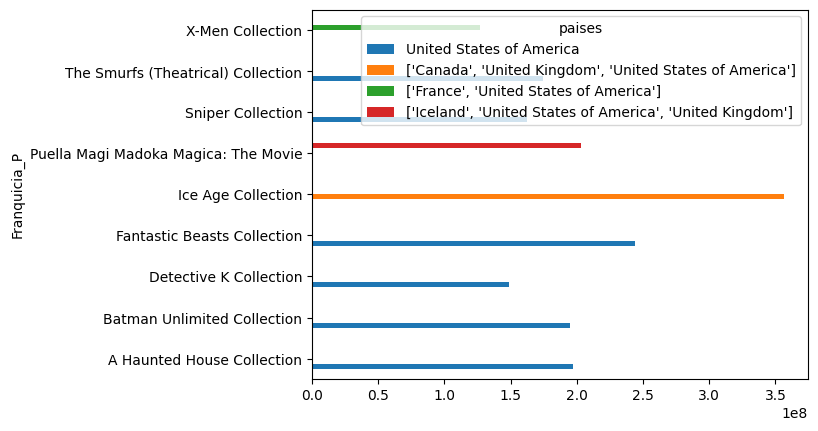

In [30]:
#los 10 franquicias con ganancia media mas alta por pais
dfff[1:10].groupby(['Franquicia_P','paises'])['revenue'].mean().unstack(1).plot.barh()
#plt.legend('')
plt.show()

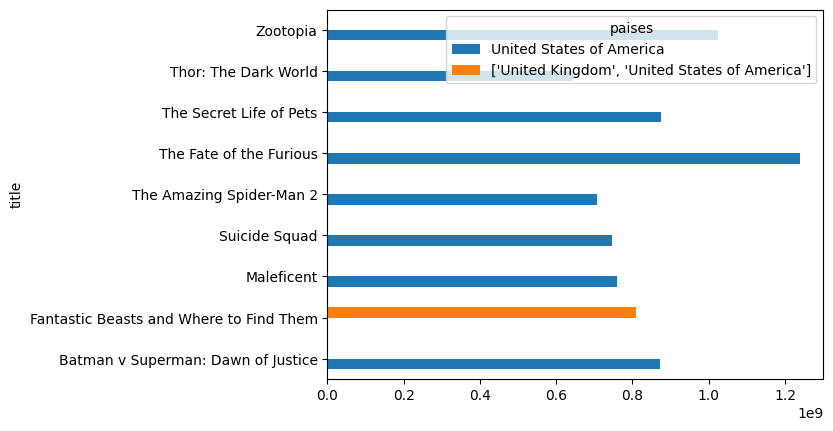

In [31]:
#los 10 peliculas con ganancia media mas alta por pais
dffs=df3o1[df3o1['Franquicia_P']=='sin_franquicia'].copy()
dffs[1:10].groupby(['title','paises'])['revenue'].mean().unstack(1).plot.barh()
#plt.legend('')
plt.show()

In [32]:
df3o1.budget.describe()

count    7.896000e+03
mean     1.797486e+06
std      1.205096e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.500000e+08
Name: budget, dtype: float64

<ipython-input-33-18919e77e0f3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3o1['budget'])


<Axes: xlabel='budget', ylabel='Density'>

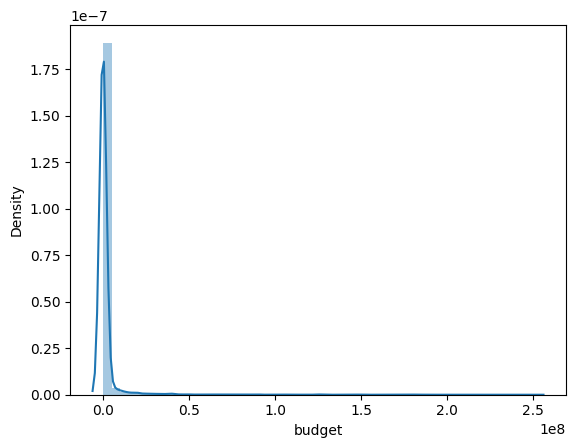

In [33]:
sns.distplot(df3o1['budget'])

*Analizo los votos o puntaje de las peliculas de los ultimos 10 años*

(0.0, 700.0)

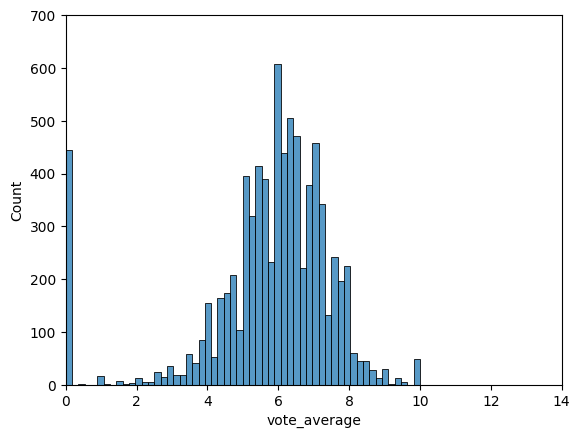

In [ ]:
#Analizo lo votos o puntaje de las peliculas de los ultimos 10 años
sns.histplot(df3o1['vote_average'])
plt.xlim(0,14)
plt.ylim(0,700)

###Analisis bivariado

In [ ]:
df3o1.describe()

,revenue,budget,id,vote_average,release_year,runtime
count,7.905000e+03,7.905000e+03,7905.000000,7905.000000,7905.000000,7835.000000
mean,1.612932e+07,5.417380e+06,293051.565338,5.748425,2014.612777,92.625144
std,9.034243e+07,2.266862e+07,85477.196027,1.869572,1.239006,34.905924
min,0.000000e+00,0.000000e+00,189.000000,0.000000,2013.000000,0.000000
25%,0.000000e+00,0.000000e+00,233470.000000,5.100000,2014.000000,85.000000
50%,0.000000e+00,0.000000e+00,297482.000000,6.000000,2015.000000,93.000000
75%,0.000000e+00,0.000000e+00,359364.000000,6.900000,2016.000000,106.000000
max,2.068224e+09,2.800000e+08,468707.000000,10.000000,2020.000000,840.000000


In [ ]:
plt.subplots(figsize=(12,6))
sns.boxplot(x=df3c.paises, y=df3.revenue)
plt.show()

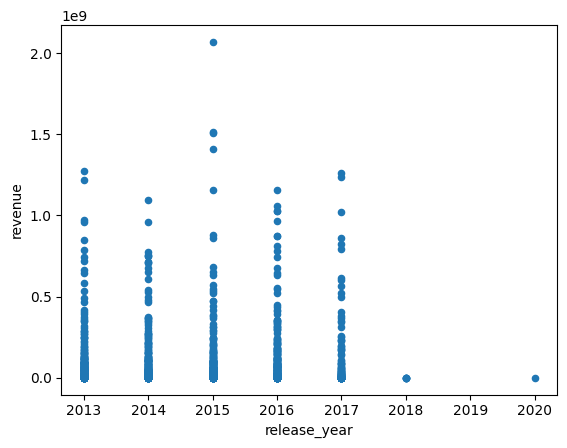

In [ ]:

df3o1.plot.scatter(x="release_year",y="revenue")
plt.show()

###Matrices de correlación




In [ ]:
df3o1[['revenue','budget','runtime']].corr()

,revenue,budget,runtime
revenue,1.000000,0.828988,0.130752
budget,0.828988,1.000000,0.163689
runtime,0.130752,0.163689,1.000000


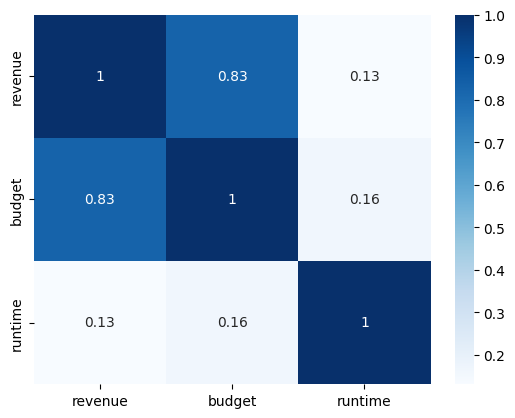

In [ ]:
sns.heatmap(df3o1[['revenue','budget','runtime']].corr(), annot=True, cmap = 'Blues')
plt.show()

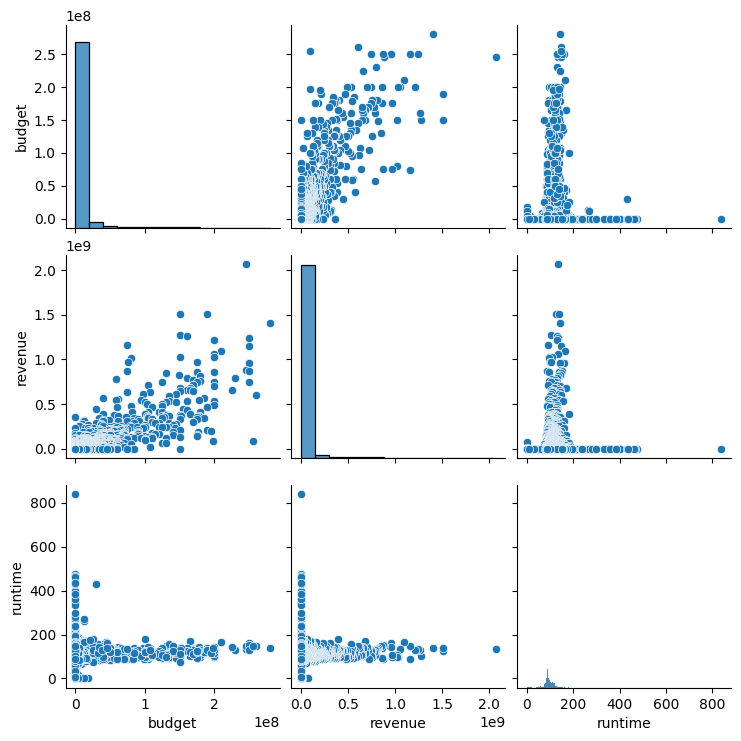

In [ ]:
#Realizo una comparacion del numero de curso pagados y la cantidad de subcriptos el precio y nivel
sns.pairplot(data = df3o1, vars=['budget','revenue','runtime'])
plt.show()

<ipython-input-107-9212edc6a487>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = df3o1.corr(method='pearson')


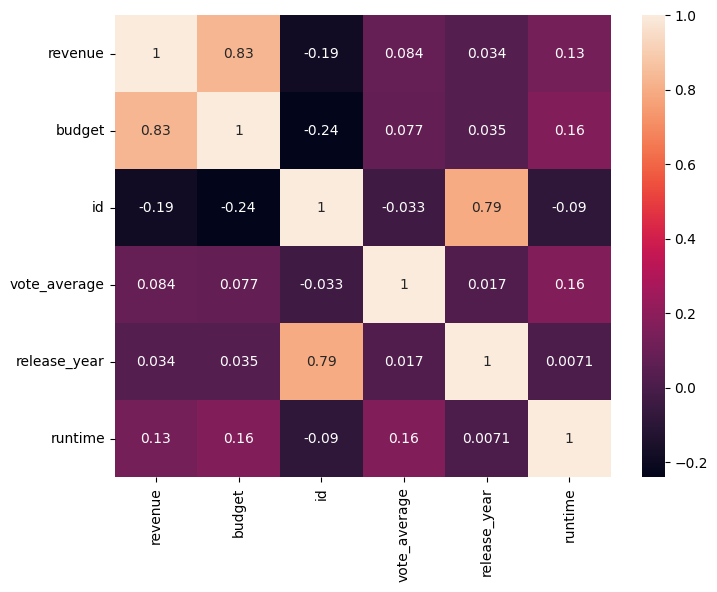

In [ ]:
corr_df = df3o1.corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

## **Nube de Palabras **

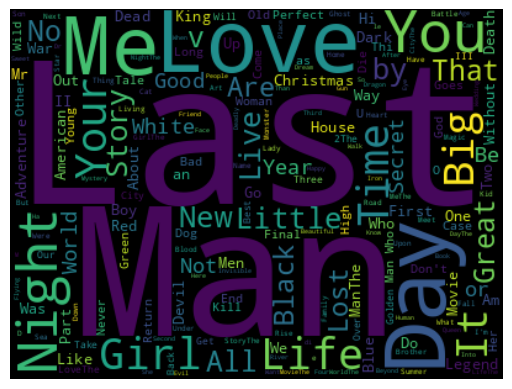

In [ ]:
# Creacion de la nube de palabras
texto=''
for i in df3c['title'].index:
    dat=df3c['title'][i]
    texto=texto+dat

wc = WordCloud(width = 400, height = 300,
               stopwords = ["En","on","My","at","Is","I","la", "los","de","a","y","s","con","of","to","and","the","for","From","in","para",'with'])
wc.generate(texto)


plt.axis("off")
plt.imshow(wc, interpolation = "bilinear")

In [88]:
df3o1.to_excel('finAP1.xlsx',index=False)